# 청와대 청원 크롤링

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup


In [3]:
url = 'https://www1.president.go.kr/petitions/best'

In [4]:
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="#082e59" name="theme-color"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." name="description">
<meta content="청와대, 대통령비서실, 대통령, 한국, 대한민국, 대한민국 정부, president.go.kr, 靑瓦臺, 19대, 문재인" name="keywords">
<meta content="청와대 (CHEONGWADAE)" name="author">
<meta content="telephone=no" name="format-detection">
<meta content="website" property="og:type"/>
<meta content="추천순 청원 목록 1페이지 &gt;  대한민국 청와대" property="og:title"/>
<meta content="https://www1.president.go.kr/petitions/best?page=1" property="og:url"/>
<meta content="대한민국 청와대" property="og:site_name"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." property="og:description"/>
<meta content="http://www.president.go.kr/css/favicon_400x210.png" property="og:image"/>
<meta content="https://www1.president.go.kr/petit

In [5]:
# 전체 경로
path = 'div.cs_area > div > div > div.board.text > div.b_list.category > div.bl_body '
tags = soup.select(path)
tags[0]

<div class="bl_body">
<ul>
<li>
<div class="bl_wrap">
<div class="bl_category cs"><span class="sound_only">분류 </span> 정치개혁</div>
<div class="bl_subject">
<a class="cb" href="/petitions/604660?navigation=best"><span class="sound_only">제목 </span>윤석열 당선자의 대장동 부산저축은행 부실수사 봐주기 의혹과 김건희의 주가조작 실체의 진상조…</a>
</div>
<span class="sound_only">청원만료 </span><div class="bl_date light">22-04-10</div>
<div class="bl_agree cb wv_agree">
<span class="sound_only">참여인원 </span>542,911명
												</div>
</div>
</li>
<li>
<div class="bl_wrap">
<div class="bl_category cs"><span class="sound_only">분류 </span> 외교/통일/국방</div>
<div class="bl_subject">
<a class="cb" href="/petitions/604773?navigation=best"><span class="sound_only">제목 </span>윤석열 당선인 집무실 만들고자, 국가안전 중추인 국방부를 강압 이전하여, 국민의 혈세 수천…</a>
</div>
<span class="sound_only">청원만료 </span><div class="bl_date light">22-04-16</div>
<div class="bl_agree cb wv_agree">
<span class="sound_only">참여인원 </span>529,551명
												</div>
</div>
</li>
<li>
<div class="bl_wrap"

In [6]:
# 분류 

cate = tags[0].select('ul > li > div > div.bl_category.cs')[0].text.split(' ')[2]
cate

'정치개혁'

In [7]:
# 제목
title = tags[0].select('ul > li > div > div.bl_subject > a')[0].text
title

'제목 윤석열 당선자의 대장동 부산저축은행 부실수사 봐주기 의혹과 김건희의 주가조작 실체의 진상조…'

In [8]:
# 만료일

end_date = tags[0].select('ul > li > div > div.bl_date.light')[0].text
end_date

'22-04-10'

In [9]:
# 참여인원
import re
num = tags[0].select('ul > li > div > div.bl_agree.cb.wv_agree')[0].text.split(' ')[1]
num_p = re.sub('[^명1-9,]','',num)
num_p

'542,911명'

In [10]:
# main url
main_url = 'https://www1.president.go.kr'

In [11]:
# url_sub
url_sub = tags[0].select('ul > li > div > div.bl_subject > a')[0]['href']
print(url_sub)

#total url
total_url = main_url + url_sub
total_url

# https://www1.president.go.kr /petitions/604660?navigation=best

/petitions/604660?navigation=best


'https://www1.president.go.kr/petitions/604660?navigation=best'

In [12]:
# 세부내용 

res1 = requests.get(total_url)
soup1 = BeautifulSoup(res1.text, 'html.parser')
soup1

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="#082e59" name="theme-color"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." name="description">
<meta content="청와대, 대통령비서실, 대통령, 한국, 대한민국, 대한민국 정부, president.go.kr, 靑瓦臺, 19대, 문재인" name="keywords">
<meta content="청와대 (CHEONGWADAE)" name="author">
<meta content="telephone=no" name="format-detection">
<meta content="website" property="og:type"/>
<meta content="윤석열 당선자의 대장동 부산저축은행 부실수사 봐주기 의혹과 김건희의 주가조작 실체의 진상조사 확인을 위한 청원입니다. &gt; 대한민국 청와대" property="og:title"/>
<meta content="https://www1.president.go.kr/petitions/604660" property="og:url"/>
<meta content="대한민국 청와대" property="og:site_name"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." property="og:description"/>
<meta content="http://www.president.go.kr/css/favicon_400x210.png" property="og:image"/>
<meta

In [70]:
## request가 막혀 미리 받아놓은 csv파일로 분석

# csv파일로 감정분석

In [45]:
pet = pd.read_csv('./data/petition.csv')
pet

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
...,...,...,...,...,...,...,...,...
377751,492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
377752,492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
377753,492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
377754,492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...


## csv파일 전처리

In [46]:
pet = pet.sample(frac=0.1).copy()
pet.head()

,article_id,start,end,answered,votes,category,title,content
292729,380895,2018-09-14,2018-10-14,0,2,기타,교도소,세금으로 호의호식하는 범죄자들 꼬라지 보기가 너무 짜증납니다. 범죄자들 먹이고 입히...
108168,129745,2018-02-06,2018-03-08,0,2,육아/교육,5자녀맘 초등지원이 하나도없습니다,전남 순천입니다 5자녀를 낳아 키우고 있습니다 애만많이낳아라하지 전부 한부모.저소득...
253501,328679,2018-08-03,2018-09-02,0,51,행정,여름철전기요금개선요청,주택에 적용되는 누진제는 과감하게 개선해야 된다고 봅니다.\n다들아는 사실이지만 일...
335607,436584,2018-11-08,2018-12-08,0,5,미래,불신,"대통령님! 국민들과의 약속을 지켜주세요, 요즘 국민들의 실망이 큼니다."
98953,115331,2018-01-26,2018-02-25,0,4,문화/예술/체육/언론,나경원 올림픽조직위원 파면,동의 합니다


In [47]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 292729 to 51082
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  37776 non-null  int64 
 1   start       37776 non-null  object
 2   end         37776 non-null  object
 3   answered    37776 non-null  int64 
 4   votes       37776 non-null  int64 
 5   category    37776 non-null  object
 6   title       37776 non-null  object
 7   content     37776 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


In [48]:
pet['start'] = pd.to_datetime(pet['start'])
pet['end'] = pd.to_datetime(pet['end'])

In [49]:
pet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 292729 to 51082
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   article_id  37776 non-null  int64         
 1   start       37776 non-null  datetime64[ns]
 2   end         37776 non-null  datetime64[ns]
 3   answered    37776 non-null  int64         
 4   votes       37776 non-null  int64         
 5   category    37776 non-null  object        
 6   title       37776 non-null  object        
 7   content     37776 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 2.6+ MB


In [50]:
pet['duration'] = pet['end'] - pet['start']

In [51]:
pet.head()

,article_id,start,end,answered,votes,category,title,content,duration
292729,380895,2018-09-14,2018-10-14,0,2,기타,교도소,세금으로 호의호식하는 범죄자들 꼬라지 보기가 너무 짜증납니다. 범죄자들 먹이고 입히...,30 days
108168,129745,2018-02-06,2018-03-08,0,2,육아/교육,5자녀맘 초등지원이 하나도없습니다,전남 순천입니다 5자녀를 낳아 키우고 있습니다 애만많이낳아라하지 전부 한부모.저소득...,30 days
253501,328679,2018-08-03,2018-09-02,0,51,행정,여름철전기요금개선요청,주택에 적용되는 누진제는 과감하게 개선해야 된다고 봅니다.\n다들아는 사실이지만 일...,30 days
335607,436584,2018-11-08,2018-12-08,0,5,미래,불신,"대통령님! 국민들과의 약속을 지켜주세요, 요즘 국민들의 실망이 큼니다.",30 days
98953,115331,2018-01-26,2018-02-25,0,4,문화/예술/체육/언론,나경원 올림픽조직위원 파면,동의 합니다,30 days


In [52]:
# 30일 이상 게시가 되고, answer을 받은 청원목록

In [53]:
pet.info() # duration의 데이터타입 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37776 entries, 292729 to 51082
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   article_id  37776 non-null  int64          
 1   start       37776 non-null  datetime64[ns] 
 2   end         37776 non-null  datetime64[ns] 
 3   answered    37776 non-null  int64          
 4   votes       37776 non-null  int64          
 5   category    37776 non-null  object         
 6   title       37776 non-null  object         
 7   content     37776 non-null  object         
 8   duration    37776 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 2.9+ MB


In [54]:
pet[(pet['duration'] >= '30 days') & (pet['answered']==1)]

,article_id,start,end,answered,votes,category,title,content,duration
164274,203181,2018-04-17,2018-05-17,1,302082,행정,다산신도시 실버택배 비용은 입주민들의 관리비로 충당해야합니다.,다산신도시 입주민들이 택배원 대상으로 갑질을 저질러 사회적으로 큰 물의를 빚은 바 ...,30 days


In [55]:
# 분야별 청원
pet['category'].value_counts()

정치개혁           5865
기타             4608
인권/성평등         3457
안전/환경          2971
외교/통일/국방       2604
교통/건축/국토       2574
육아/교육          2464
보건복지           2341
일자리            2273
행정             1951
문화/예술/체육/언론    1760
미래             1730
경제민주화          1605
성장동력            673
반려동물            400
저출산/고령화대책       329
농산어촌            171
Name: category, dtype: int64

<AxesSubplot:>

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53440 mi

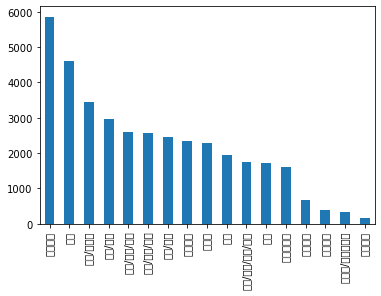

In [56]:
pet['category'].value_counts().plot(kind='bar')

## pet_by_moon 데이터프레임 설정

In [141]:
pet_by_moon = pet.sort_values('start')
pet_by_moon

,article_id,start,end,answered,votes,category,title,content,duration
17,38,2017-08-19,2017-08-26,0,0,외교/통일/국방,한중관계 사드 갈등 해소방법 찾았습니다.,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다.\n시진핑 주석 한테 이렇게...,7 days
36,59,2017-08-19,2017-10-18,0,2,반려동물,"유기동물 재발방지를 위한 반려동물 번식업, 반려동물 판매업, 반려동물 등록법 개정 요구",안녕하세요.\n사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다.\n우리...,60 days
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,90 days
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...,7 days
122,146,2017-08-20,2017-09-04,0,15,교통/건축/국토,8.2 부동산 대책 중 재개발/재건축 관련 청원입니다.,안녕하세요. 요즘 참 바람잘 날 없는 대한민국입니다. 대외와 대내가 모두 많은 위협...,15 days
...,...,...,...,...,...,...,...,...,...
377128,491283,2019-01-09,2019-02-08,0,1,경제민주화,다음 카카오에 묻는다,쇄국정책 옹호론자들 같아 카풀 반대 기사들을 지지하고 싶은 마음은 없다\n그렇다고 ...,30 days
377279,491450,2019-01-09,2019-02-08,0,15,일자리,최저시급 당장 낮춰야 합니다.제발 살려주세요..,안녕하십니까..저는 안녕하지 못하네요;;\n19년 새해가 정말 최악에 시작인듯합니다...,30 days
377466,491667,2019-01-09,2019-02-08,0,4,정치개혁,대국민 민중봉기,이제 모두가 일어서야 할때다.그대로 지켜본다는것은 끝없는 재앙만 가중할뿐이다.속히...,30 days
377172,491331,2019-01-09,2019-02-08,0,1,외교/통일/국방,북한과의 완벽한 관계개선을 위하여 청와대에 바치는 글,死 의 길(道)\n명령 복종.\n이게 가장 필요합니다.\n북한은 독재국가라고 합니다...,30 days


## 월별 등장빈도가 가장 많은 상위 5개 단어를 출력

In [142]:
# 년+월 열 만들어주기
pet_by_moon['yearmonth'] = pet_by_moon['start'].astype('str').apply(lambda x : x[:7])
pet_by_moon.head()

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth
17,38,2017-08-19,2017-08-26,0,0,외교/통일/국방,한중관계 사드 갈등 해소방법 찾았습니다.,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다.\n시진핑 주석 한테 이렇게...,7 days,2017-08
36,59,2017-08-19,2017-10-18,0,2,반려동물,"유기동물 재발방지를 위한 반려동물 번식업, 반려동물 판매업, 반려동물 등록법 개정 요구",안녕하세요.\n사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다.\n우리...,60 days,2017-08
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,90 days,2017-08
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...,7 days,2017-08
122,146,2017-08-20,2017-09-04,0,15,교통/건축/국토,8.2 부동산 대책 중 재개발/재건축 관련 청원입니다.,안녕하세요. 요즘 참 바람잘 날 없는 대한민국입니다. 대외와 대내가 모두 많은 위협...,15 days,2017-08


## 자연어 전처리 

In [143]:
# konlpy 작동확인
from konlpy.tag import Komoran
kor = Komoran()

In [144]:
kor.nouns('가슴 아파도 나 이렇게 웃어요')

['가슴']

#### 한글+공백 만 남기기

In [145]:
# import re
# def text_clean(doc):
#     doc = re.sub('[^가-힣ㄱ-ㅎㅏ-l ]','',doc)
#     return doc

In [146]:
import re
def text_clean(doc):
    doc = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ ]','',doc)
    doc = re.sub('\s+',' ',doc)
    return doc

In [157]:
# 제거 후 공백이 한칸 남음 -> 빈값 처리해줘야함
te = 'a nnndfsdf; erwk3      dkf;  '
text_clean(te)

' '

In [147]:
pet_by_moon['clean_content'] = pet_by_moon['content'].apply(text_clean)

In [148]:
pet_by_moon.head()

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content
17,38,2017-08-19,2017-08-26,0,0,외교/통일/국방,한중관계 사드 갈등 해소방법 찾았습니다.,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다.\n시진핑 주석 한테 이렇게...,7 days,2017-08,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다시진핑 주석 한테 이렇게 말해...
36,59,2017-08-19,2017-10-18,0,2,반려동물,"유기동물 재발방지를 위한 반려동물 번식업, 반려동물 판매업, 반려동물 등록법 개정 요구",안녕하세요.\n사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다.\n우리...,60 days,2017-08,안녕하세요사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다우리나라는 매년...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,90 days,2017-08,현 정부에 국민들이 가장 원하는 것은 부패척결입니다 우리 사회에 각종 비리들이 많은...
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...,7 days,2017-08,청원인 왕 기 운서울 도봉구 창동 삼성아파트 호청원취지보건복지부 부령 제호중 특수의...
122,146,2017-08-20,2017-09-04,0,15,교통/건축/국토,8.2 부동산 대책 중 재개발/재건축 관련 청원입니다.,안녕하세요. 요즘 참 바람잘 날 없는 대한민국입니다. 대외와 대내가 모두 많은 위협...,15 days,2017-08,안녕하세요 요즘 참 바람잘 날 없는 대한민국입니다 대외와 대내가 모두 많은 위협과 ...


In [149]:
pet_by_moon.shape

(37776, 11)

#### 빈값처리

In [150]:
# 빈값 확인
pet_by_moon[pet_by_moon['clean_content']== '']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content
8395,8447,2017-09-05,2017-10-05,0,0,인권/성평등,청소년법 폐지,http://www1.president.go.kr/petitions/1785?nav...,30 days,2017-09,
13114,13175,2017-09-10,2017-09-25,0,1,외교/통일/국방,여성 군복무가 아닌 교육복무 환영,http://news.zum.com/articles/40221944,15 days,2017-09,
13508,13575,2017-09-12,2017-09-19,0,0,미래,.,-,7 days,2017-09,
13954,14033,2017-09-15,2017-10-15,0,0,기타,3년전 3일동안 국정원의 장애인 납치 불법수술 생체시험 살인미수 인권유린,d,30 days,2017-09,
19289,19538,2017-10-06,2017-11-05,0,0,행정,1,1,30 days,2017-10,
29034,30306,2017-11-09,2017-12-09,0,0,일자리,xddf,Zx,30 days,2017-11,
27080,28317,2017-11-09,2017-12-09,0,3,정치개혁,대한민국 최악의 성범죄의 주범인 조두순을 징역 12년만 살게 해선 안됩니다,.,30 days,2017-11,
36006,37338,2017-11-11,2017-12-11,0,2,정치개혁,https://www1.president.go.kr/petitions/31254?n...,https://www1.president.go.kr/petitions/31254?n...,30 days,2017-11,
39119,40492,2017-11-11,2017-12-11,0,0,성장동력,이명박 출국 금지라고 쓰시는 분들은 위에 추천순 버튼을 누르고 내리다 보면 있는데 ...,.,30 days,2017-11,
32895,34222,2017-11-11,2017-12-11,0,0,정치개혁,이명박 출금금지,.,30 days,2017-11,


In [151]:
# 빈값 제거
pet_by_moon = pet_by_moon[pet_by_moon['clean_content']!= '']

In [152]:
# 제거확인
pet_by_moon[pet_by_moon['clean_content']== '']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content


In [153]:
pet_by_moon.shape

(37725, 11)

In [167]:
# ' ' 빈값 없애주기
pet_by_moon[pet_by_moon['clean_content']== ' ']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content
13086,13147,2017-09-10,2017-10-10,0,0,육아/교육,The abolition of Korean youth law.,"Hello, Moon Jae-in president, other Korean mid...",30 days,2017-09,
54381,56545,2017-12-02,2018-01-01,0,9,기타,DELETE AND CLOSE MAMA (MNET),I want the MAMA (MNET) event to be immediately...,30 days,2017-12,
109093,130760,2018-02-06,2018-03-08,0,1,정치개혁,1 + 1= 2 돼는 대한민주 공화국이다 3을 만들려고하지않는다.,1 + 1 = 2,30 days,2018-02,
220631,285829,2018-06-26,2018-07-26,0,27,외교/통일/국방,No Dispatch,There're so many fake news coming from Dispatc...,30 days,2018-06,
232925,301575,2018-07-10,2018-08-09,0,18,문화/예술/체육/언론,Petition to close Dispatch,The work of some sites has spoilt too much liv...,30 days,2018-07,
280885,364756,2018-09-03,2018-10-03,0,0,저출산/고령화대책,ccccc,i argee,30 days,2018-09,


In [168]:
# 빈값 제거
pet_by_moon = pet_by_moon[pet_by_moon['clean_content']!= ' ']

In [169]:
# 제거 확인
pet_by_moon[pet_by_moon['clean_content']== ' ']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content


#### 토큰화

In [170]:
# 빈값 처리를 안해주면 Java오류가 남!
# 7분 시간 소요 왜 mecab을 쓰려고 하는 지 알 것 같다

clean_tokens = []
for w in pet_by_moon['clean_content']:
    token = kor.nouns(w)
    clean_tokens.append(token)
    
pet_by_moon['clean_tokens']= clean_tokens

In [171]:
pet_by_moon.head()

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens
17,38,2017-08-19,2017-08-26,0,0,외교/통일/국방,한중관계 사드 갈등 해소방법 찾았습니다.,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다.\n시진핑 주석 한테 이렇게...,7 days,2017-08,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다시진핑 주석 한테 이렇게 말해...,"[문재인, 대통령, 중, 관계, 사드, 갈등, 해소, 방법, 습, 니다, 시진핑, ..."
36,59,2017-08-19,2017-10-18,0,2,반려동물,"유기동물 재발방지를 위한 반려동물 번식업, 반려동물 판매업, 반려동물 등록법 개정 요구",안녕하세요.\n사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다.\n우리...,60 days,2017-08,안녕하세요사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다우리나라는 매년...,"[안녕하세요, 사람과, 동물, 자연, 생각, 국민, 청원, 합, 니다, 우리나라, ..."
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,90 days,2017-08,현 정부에 국민들이 가장 원하는 것은 부패척결입니다 우리 사회에 각종 비리들이 많은...,"[정부, 국민, 것, 부패, 척결, 사회, 각종, 비리, 내부, 고발, 내부고발자,..."
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...,7 days,2017-08,청원인 왕 기 운서울 도봉구 창동 삼성아파트 호청원취지보건복지부 부령 제호중 특수의...,"[청원, 왕, 기, 서울, 도봉구, 창동, 삼성, 아파트, 호, 청원, 취지, 보건..."
122,146,2017-08-20,2017-09-04,0,15,교통/건축/국토,8.2 부동산 대책 중 재개발/재건축 관련 청원입니다.,안녕하세요. 요즘 참 바람잘 날 없는 대한민국입니다. 대외와 대내가 모두 많은 위협...,15 days,2017-08,안녕하세요 요즘 참 바람잘 날 없는 대한민국입니다 대외와 대내가 모두 많은 위협과 ...,"[안녕하세요, 요즘, 바람, 날, 대한민국, 대외, 대내, 위협, 도전, 직면, 와..."


#### 빈값처리

In [197]:
pet_by_moon[pet_by_moon['clean_tokens'] == '' ]

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens


In [198]:
pet_by_moon.loc[2817]

article_id                               2858
start                     2017-09-04 00:00:00
end                       2017-09-11 00:00:00
answered                                    0
votes                                       0
category                                안전/환경
title                  부산청소년폭행 강력하게 처벌을 청원합니다
content                              너무하네요 진짜
duration                      7 days 00:00:00
yearmonth                             2017-09
clean_content                        너무하네요 진짜
clean_tokens                               []
remove_clean_tokens                          
Name: 2817, dtype: object

#### stopword 제외시키기

In [200]:
st_df = pd.read_csv('./data/stopwords-ko.txt',header = None)
st_list = st_df[0].tolist()

def remove_stwords(doc):
    doc = [w for w in doc if w not in st_list]
    doc = ' '.join(doc)
    return doc

In [201]:
pet_by_moon['remove_clean_tokens'] = pet_by_moon['clean_tokens'].apply(remove_stwords)

In [202]:
pet_by_moon.head()

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens
17,38,2017-08-19,2017-08-26,0,0,외교/통일/국방,한중관계 사드 갈등 해소방법 찾았습니다.,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다.\n시진핑 주석 한테 이렇게...,7 days,2017-08,문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다시진핑 주석 한테 이렇게 말해...,"[문재인, 대통령, 중, 관계, 사드, 갈등, 해소, 방법, 습, 니다, 시진핑, ...",문재인 대통령 중 관계 사드 갈등 해소 방법 습 니다 시진핑 주석 말 해 야합 니다...
36,59,2017-08-19,2017-10-18,0,2,반려동물,"유기동물 재발방지를 위한 반려동물 번식업, 반려동물 판매업, 반려동물 등록법 개정 요구",안녕하세요.\n사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다.\n우리...,60 days,2017-08,안녕하세요사람과 동물과 자연을 소중하게 생각하는 국민으로서 청원합니다우리나라는 매년...,"[안녕하세요, 사람과, 동물, 자연, 생각, 국민, 청원, 합, 니다, 우리나라, ...",안녕하세요 사람과 동물 자연 생각 국민 청원 합 니다 우리나라 유기동물 수 급증 사...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,90 days,2017-08,현 정부에 국민들이 가장 원하는 것은 부패척결입니다 우리 사회에 각종 비리들이 많은...,"[정부, 국민, 것, 부패, 척결, 사회, 각종, 비리, 내부, 고발, 내부고발자,...",정부 국민 부패 척결 사회 비리 내부 고발 내부고발자 이익 경우 내부고발자 보호 정...
5,26,2017-08-19,2017-08-26,0,2,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...,7 days,2017-08,청원인 왕 기 운서울 도봉구 창동 삼성아파트 호청원취지보건복지부 부령 제호중 특수의...,"[청원, 왕, 기, 서울, 도봉구, 창동, 삼성, 아파트, 호, 청원, 취지, 보건...",청원 왕 기 서울 도봉구 창동 삼성 아파트 호 청원 취지 보건 복지부 제호 중 특수...
122,146,2017-08-20,2017-09-04,0,15,교통/건축/국토,8.2 부동산 대책 중 재개발/재건축 관련 청원입니다.,안녕하세요. 요즘 참 바람잘 날 없는 대한민국입니다. 대외와 대내가 모두 많은 위협...,15 days,2017-08,안녕하세요 요즘 참 바람잘 날 없는 대한민국입니다 대외와 대내가 모두 많은 위협과 ...,"[안녕하세요, 요즘, 바람, 날, 대한민국, 대외, 대내, 위협, 도전, 직면, 와...",안녕하세요 요즘 바람 날 대한민국 대외 대내 위협 도전 직면 와중 대한민국 대통령 ...


In [212]:
# 전처리하는 중 빈리스트값들이 들어가 있는것을 확인

pet_by_moon[pet_by_moon['clean_tokens'].apply(bool) == False]

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens
2817,2858,2017-09-04,2017-09-11,0,0,안전/환경,부산청소년폭행 강력하게 처벌을 청원합니다,너무하네요 진짜,7 days,2017-09,너무하네요 진짜,[],
3387,3428,2017-09-04,2017-12-03,0,0,인권/성평등,소년법 폐지 또는 개안을 원합니다.,제발 들어주세요,90 days,2017-09,제발 들어주세요,[],
2827,2868,2017-09-04,2017-09-11,0,0,안전/환경,부산청소년폭행 강력하게 처벌을 청원합니다,너무하네요 진짜,7 days,2017-09,너무하네요 진짜,[],
3389,3430,2017-09-04,2017-12-03,0,0,인권/성평등,소년법 폐지 또는 개안을 원합니다.,제발 들어주세요,90 days,2017-09,제발 들어주세요,[],
2308,2346,2017-09-04,2017-09-11,0,0,인권/성평등,청소년 보호법 폐지해주세요~,페지해주세요!,7 days,2017-09,페지해주세요,[],
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371856,484175,2019-01-01,2019-01-31,0,4,정치개혁,국회법안,법안처리가당리당약에의해\n처리가되지않의무로\n일정기간지나면자동상정되어\n대표국민표결...,30 days,2019-01,법안처리가당리당약에의해처리가되지않의무로일정기간지나면자동상정되어대표국민표결로과반수통과...,[],
372943,485561,2019-01-02,2019-02-01,0,45,보건복지,강북 삼성병원 의료진 사망사건에 관련 한 의료안정성을 위한청윈,동일합니다,30 days,2019-01,동일합니다,[],
372950,485569,2019-01-02,2019-02-01,0,0,기타,어중간한 자영업자 죽이는 정부 대책?,ㅜㅜ,30 days,2019-01,ㅜㅜ,[],
374341,487418,2019-01-04,2019-02-03,0,14,정치개혁,시의원.군의원,"예천에서일어난,군의원추태사건\n정말나라망신아닌지요.\n군믽시민들세금의로연수란명목으로...",30 days,2019-01,예천에서일어난군의원추태사건정말나라망신아닌지요군믽시민들세금의로연수란명목으로여행가면서접...,[],


In [203]:
pet_by_moon[pet_by_moon['clean_tokens']== []]

ValueError: ('Lengths must match to compare', (37719,), (0,))

In [186]:
pet_by_moon[pet_by_moon['remove_clean_tokens']== '']

,article_id,start,end,answered,votes,category,title,content,duration,yearmonth,clean_content,clean_tokens,remove_clean_tokens
2817,2858,2017-09-04,2017-09-11,0,0,안전/환경,부산청소년폭행 강력하게 처벌을 청원합니다,너무하네요 진짜,7 days,2017-09,너무하네요 진짜,[],
3387,3428,2017-09-04,2017-12-03,0,0,인권/성평등,소년법 폐지 또는 개안을 원합니다.,제발 들어주세요,90 days,2017-09,제발 들어주세요,[],
2827,2868,2017-09-04,2017-09-11,0,0,안전/환경,부산청소년폭행 강력하게 처벌을 청원합니다,너무하네요 진짜,7 days,2017-09,너무하네요 진짜,[],
3389,3430,2017-09-04,2017-12-03,0,0,인권/성평등,소년법 폐지 또는 개안을 원합니다.,제발 들어주세요,90 days,2017-09,제발 들어주세요,[],
2308,2346,2017-09-04,2017-09-11,0,0,인권/성평등,청소년 보호법 폐지해주세요~,페지해주세요!,7 days,2017-09,페지해주세요,[],
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371856,484175,2019-01-01,2019-01-31,0,4,정치개혁,국회법안,법안처리가당리당약에의해\n처리가되지않의무로\n일정기간지나면자동상정되어\n대표국민표결...,30 days,2019-01,법안처리가당리당약에의해처리가되지않의무로일정기간지나면자동상정되어대표국민표결로과반수통과...,[],
372943,485561,2019-01-02,2019-02-01,0,45,보건복지,강북 삼성병원 의료진 사망사건에 관련 한 의료안정성을 위한청윈,동일합니다,30 days,2019-01,동일합니다,[],
372950,485569,2019-01-02,2019-02-01,0,0,기타,어중간한 자영업자 죽이는 정부 대책?,ㅜㅜ,30 days,2019-01,ㅜㅜ,[],
374341,487418,2019-01-04,2019-02-03,0,14,정치개혁,시의원.군의원,"예천에서일어난,군의원추태사건\n정말나라망신아닌지요.\n군믽시민들세금의로연수란명목으로...",30 days,2019-01,예천에서일어난군의원추태사건정말나라망신아닌지요군믽시민들세금의로연수란명목으로여행가면서접...,[],
